<a href="https://colab.research.google.com/github/Chidiebere-Ogbuchi/Hamoye-StageE/blob/main/TimeSeries_Hamoye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load Dataset

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00235/household_power_consumption.zip",
                 sep = ';', header=0, low_memory=False,na_values = '?')

In [6]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.70,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [7]:
len(df)

2075259

In [8]:
# #convert 'date' and 'time' to a time series object and use 'date' as index
from datetime import datetime

df['Date'] = pd.to_datetime(df.Date)
df['Time'] = pd.to_datetime(df.Time)
df.set_index('Date', inplace = True)

<ipython-input-8-290d96fb27b3>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df.Date)


In [9]:
df.dtypes

Time                     datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object

In [10]:
# Compute the sum of missing values in each column
na_sum = df.isna().sum()

# Display the sum of missing values
print(na_sum)

Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [11]:
df.describe

<bound method NDFrame.describe of                           Time  Global_active_power  Global_reactive_power  \
Date                                                                         
2006-12-16 2023-12-05 17:24:00                4.216                  0.418   
2006-12-16 2023-12-05 17:25:00                5.360                  0.436   
2006-12-16 2023-12-05 17:26:00                5.374                  0.498   
2006-12-16 2023-12-05 17:27:00                5.388                  0.502   
2006-12-16 2023-12-05 17:28:00                3.666                  0.528   
...                        ...                  ...                    ...   
2010-11-26 2023-12-05 20:58:00                0.946                  0.000   
2010-11-26 2023-12-05 20:59:00                0.944                  0.000   
2010-11-26 2023-12-05 21:00:00                0.938                  0.000   
2010-11-26 2023-12-05 21:01:00                0.934                  0.000   
2010-11-26 2023-12-05 21:02:00

In [12]:
# Check for null values in each row
null_rows = df[df.isnull().any(axis=1)]

# Display the rows with null values
print(null_rows)

                          Time  Global_active_power  Global_reactive_power  \
Date                                                                         
2006-12-21 2023-12-05 11:23:00                  NaN                    NaN   
2006-12-21 2023-12-05 11:24:00                  NaN                    NaN   
2006-12-30 2023-12-05 10:08:00                  NaN                    NaN   
2006-12-30 2023-12-05 10:09:00                  NaN                    NaN   
2007-01-14 2023-12-05 18:36:00                  NaN                    NaN   
...                        ...                  ...                    ...   
2010-09-28 2023-12-05 19:09:00                  NaN                    NaN   
2010-09-28 2023-12-05 19:10:00                  NaN                    NaN   
2010-09-28 2023-12-05 19:11:00                  NaN                    NaN   
2010-09-28 2023-12-05 19:12:00                  NaN                    NaN   
2010-10-24 2023-12-05 15:35:00                  NaN             

In [14]:
# fill missing values using forward-fill and make the changes permanent in the original dataframe

df.ffill(axis=0,inplace=True)

In [15]:
#recheck missing values
df.isnull().sum()

Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

<ipython-input-16-28b6309ae577>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df.resample('D').sum()


Text(0.5, 1.0, 'Upsampled Data by Day')

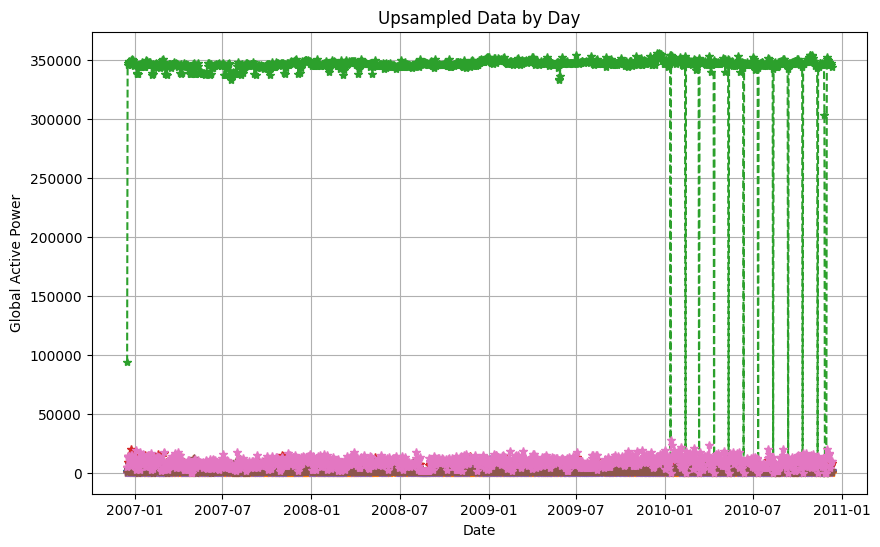

In [16]:
#Resample to daily data points
df_daily = df.resample('D').sum()

plt.figure(figsize=(10,6))
plt.plot(df_daily, '--', marker='*')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.title('Upsampled Data by Day')

In [17]:
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0


Text(0.5, 1.0, 'Plot of Passengers by Year')

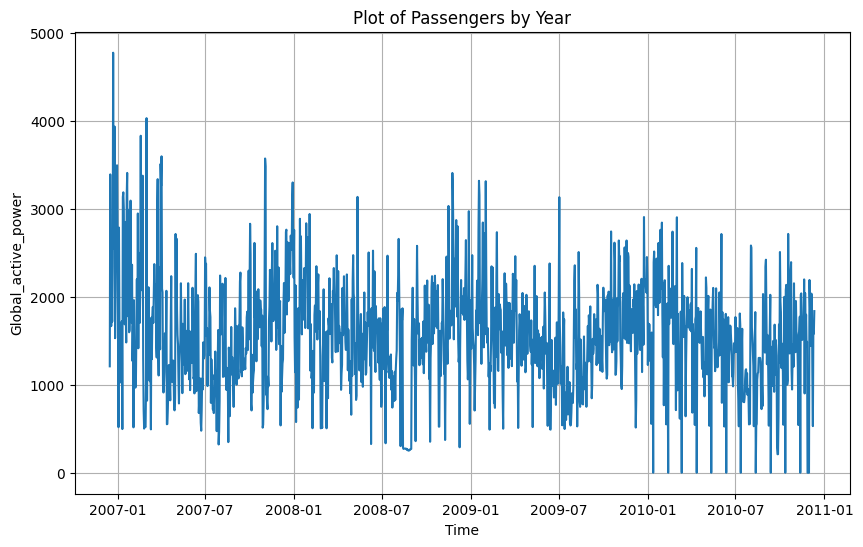

In [18]:
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.Global_active_power )
plt.grid()
plt.xlabel('Time')
plt.ylabel('Global_active_power')
plt.title('Plot of Passengers by Year')

In [44]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df_daily.Global_active_power, df_daily.Voltage)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.261


In [20]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df_daily.Voltage , df_daily.Global_intensity)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.265


In [ ]:
### Time Series

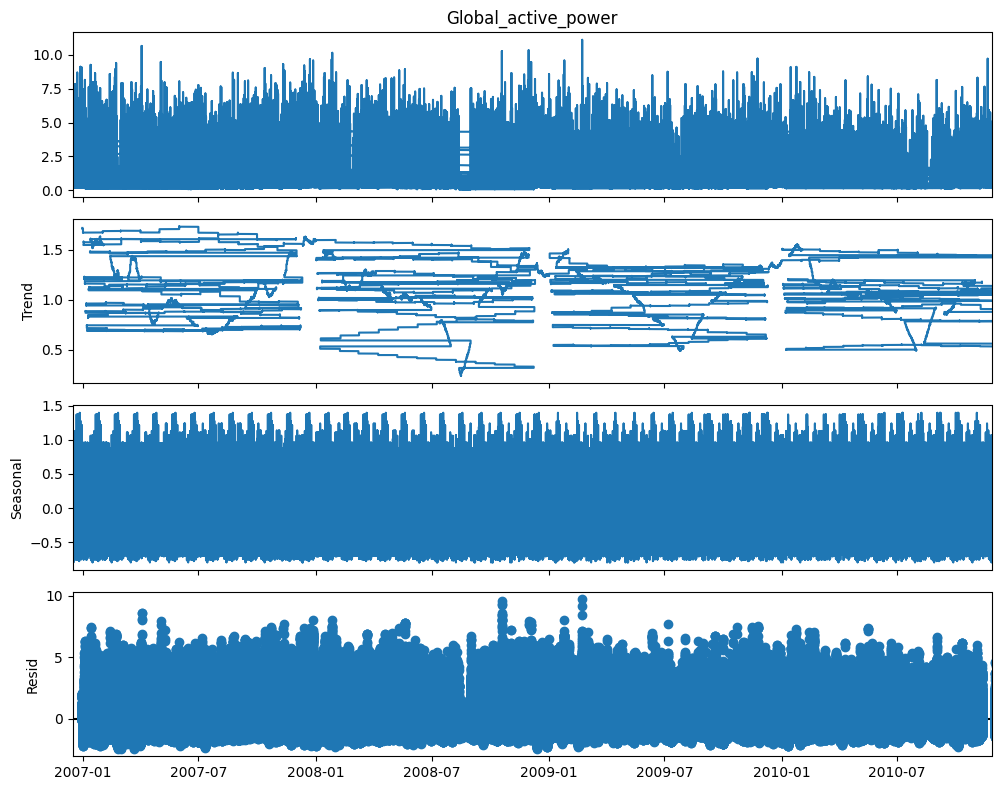

In [23]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import rcParams

# Set the figure size
rcParams['figure.figsize'] = 10, 8

# Perform seasonal decomposition
decompose_series = sm.tsa.seasonal_decompose(df['Global_active_power'], model='additive', period=60*24*30)

# Plot the decomposed components
decompose_series.plot()
plt.show()


In [24]:
#ADF test for stationarity

from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_daily['Global_active_power'])

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')

for k, v in adf_result[4].items():
    print(f'   {k}: {v}')

ADF Statistic: -8.730466104846856
p-value: 3.201990867649428e-14
No. of lags used: 8
No. of observations used : 1448
Critical Values:
   1%: -3.434874123222469
   5%: -2.8635380960841084
   10%: -2.5678337706609993


In [26]:
from prophet import Prophet

In [27]:
df_daily_new = df_daily.reset_index()
df_daily_new.head(2)

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0


In [28]:
#Create a subset of date and Global_active_power
df_daily_new = df_daily_new[['Date','Global_active_power']]
df_daily_new.head()

,Date,Global_active_power
0,2006-12-16,1209.176
1,2006-12-17,3390.460
2,2006-12-18,2203.826
3,2006-12-19,1666.194
4,2006-12-20,2225.748


In [29]:
df_daily_new = df_daily_new.rename(columns={"Date": "ds", "Global_active_power": "y"})

In [30]:
X = df_daily_new
y  = df_daily_new.y

In [31]:
x = int(len(X))
X_train, X_test = X[:300], X[300:]
y_train, y_test = y[:300], y[300:]

In [32]:
model = Prophet()
model.fit(X_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp98ed4xkf/zxl36hkp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp98ed4xkf/pwo88eu7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21983', 'data', 'file=/tmp/tmp98ed4xkf/zxl36hkp.json', 'init=/tmp/tmp98ed4xkf/pwo88eu7.json', 'output', 'file=/tmp/tmp98ed4xkf/prophet_modelc7vrdwv1/prophet_model-20231205183001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:30:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:30:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [33]:
#predict for the next 12 months
future = model.make_future_dataframe(periods=20, freq='D')
forecast = model.predict(future)
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-12-16,2086.265632,1280.503874,3025.362634,2086.265632,2086.265632,32.452968,32.452968,32.452968,32.452968,32.452968,32.452968,0.0,0.0,0.0,2118.718600
1,2006-12-17,2082.356085,1455.788315,3211.761857,2082.356085,2082.356085,244.441156,244.441156,244.441156,244.441156,244.441156,244.441156,0.0,0.0,0.0,2326.797241
2,2006-12-18,2078.446538,1242.214805,2948.776244,2078.446538,2078.446538,-7.893877,-7.893877,-7.893877,-7.893877,-7.893877,-7.893877,0.0,0.0,0.0,2070.552661
3,2006-12-19,2074.536991,1208.162368,2930.241624,2074.536991,2074.536991,-25.528349,-25.528349,-25.528349,-25.528349,-25.528349,-25.528349,0.0,0.0,0.0,2049.008642
4,2006-12-20,2070.627445,1187.373827,2948.163005,2070.627445,2070.627445,5.487360,5.487360,5.487360,5.487360,5.487360,5.487360,0.0,0.0,0.0,2076.114805
5,2006-12-21,2066.717898,1092.317563,2761.375370,2066.717898,2066.717898,-129.213697,-129.213697,-129.213697,-129.213697,-129.213697,-129.213697,0.0,0.0,0.0,1937.504200
6,2006-12-22,2062.808351,1091.582372,2774.861540,2062.808351,2062.808351,-119.745560,-119.745560,-119.745560,-119.745560,-119.745560,-119.745560,0.0,0.0,0.0,1943.062791
7,2006-12-23,2058.898804,1202.485692,3009.148095,2058.898804,2058.898804,32.452968,32.452968,32.452968,32.452968,32.452968,32.452968,0.0,0.0,0.0,2091.351772
8,2006-12-24,2054.989257,1480.026134,3170.727424,2054.989257,2054.989257,244.441156,244.441156,244.441156,244.441156,244.441156,244.441156,0.0,0.0,0.0,2299.430413
9,2006-12-25,2051.079711,1131.535083,2957.665252,2051.079711,2051.079711,-7.893877,-7.893877,-7.893877,-7.893877,-7.893877,-7.893877,0.0,0.0,0.0,2043.185833


In [34]:
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]



,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2006-12-16,2118.718600,1280.503874,3025.362634,2086.265632,2086.265632,2086.265632
1,2006-12-17,2326.797241,1455.788315,3211.761857,2082.356085,2082.356085,2082.356085
2,2006-12-18,2070.552661,1242.214805,2948.776244,2078.446538,2078.446538,2078.446538
3,2006-12-19,2049.008642,1208.162368,2930.241624,2074.536991,2074.536991,2074.536991
4,2006-12-20,2076.114805,1187.373827,2948.163005,2070.627445,2070.627445,2070.627445
...,...,...,...,...,...,...,...
315,2007-10-27,1257.200186,351.913746,2065.685510,1224.747218,1223.295134,1225.977695
316,2007-10-28,1467.715885,629.466634,2389.744470,1223.274729,1221.621189,1224.638164
317,2007-10-29,1213.908363,380.049234,2088.913740,1221.802240,1219.977597,1223.331983
318,2007-10-30,1194.801401,366.801668,2097.630154,1220.329751,1218.295384,1221.999672


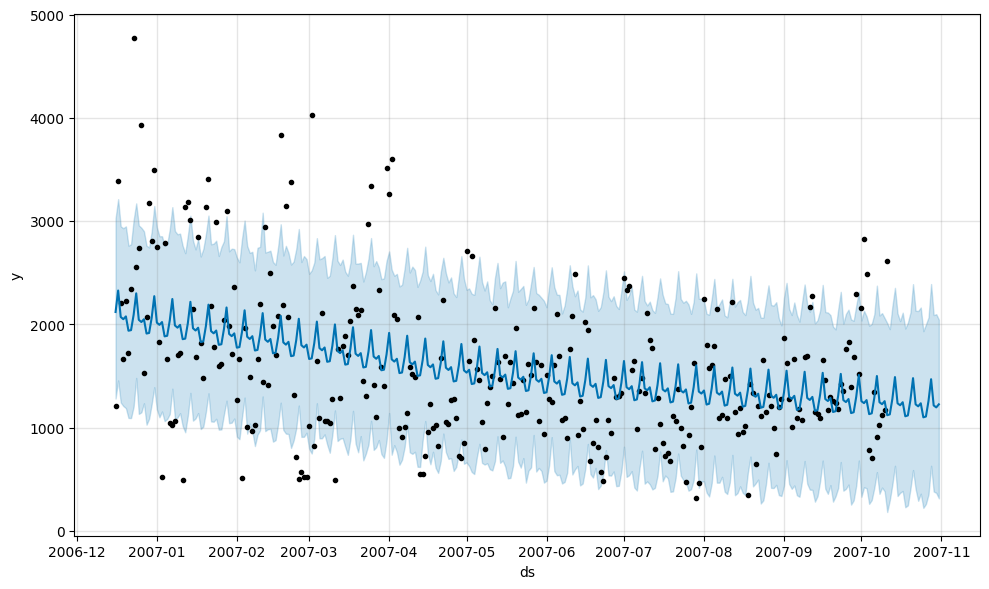

In [35]:
model.plot(forecast)
plt.show()

In [36]:
#Calculate MAPE

import numpy as np

def mape(actual, pred):
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [38]:
actual = y_train
pred = forecast['yhat'][:300]

mape(actual, pred)

42.26337705512808

In [40]:
#calculate rmse
import sklearn
from sklearn.metrics import mean_squared_error
import math
from math import sqrt

actual = y_train
predicted = forecast['yhat'][:300]

mse = sklearn.metrics.mean_squared_error(actual, predicted)

rmse = math.sqrt(mse)

print(rmse)

676.3737438545083
